# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

df = pd.read_csv('data/human_body_temperature.csv')

print(df.head())
print(np.mean(df.temperature))

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
98.24923076923078


# 1) Is the distribution of body temperatures normal?

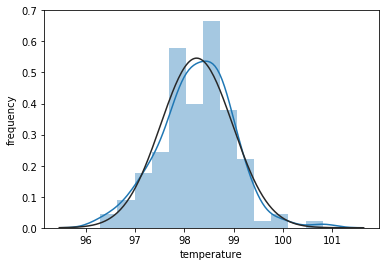

In [3]:
#first we start by graphically examining the temp visually

temperature = df['temperature']

# Plot histogram of temperature
#_ = plt.hist(temperature, bins=100, normed=True)
_ = sns.distplot(temperature, fit=norm)

# Label axes
plt.xlabel('temperature')
plt.ylabel('frequency')

plt.show()

Looks bell shaped but there is missing data so graphically we can conclude it is normally distributed

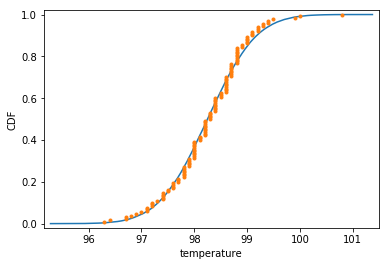

In [4]:
### make emperical cumulative distribution function (ECDF) to compare to theoretical normal distribution

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Compute mean and standard deviation: mu, sigma
mu = np.mean(temperature)
sigma = np.std(temperature)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 100000)

# Get the CDF of the samples and of the data
x_theor, y_theor= ecdf(samples)
x, y = ecdf(temperature)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

# Set margins
plt.margins(.02)

# axis labels 
_ = plt.xlabel('temperature')
_ = plt.ylabel('CDF')


plt.show()

looks like a fairly good comparison although there is sligght deviation at the higher temperatures

# 2) Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [22]:
#checking the size of the sample

print('total sample (male and female) is', len(temperature))

#for next analysis we check male and female sample size seperately 

print(df.groupby('gender').size())

total sample (male and female) is 130
gender
F    65
M    65
dtype: int64


The sample size is greater than 30 for both thus considered sufficient for the CLT. Each observation is independent of one another since everyone is different (e.g. eat different, excercise different, etc)

# 3) Is the true population mean really 98.6 degrees F?

First, try a bootstrap hypothesis test.

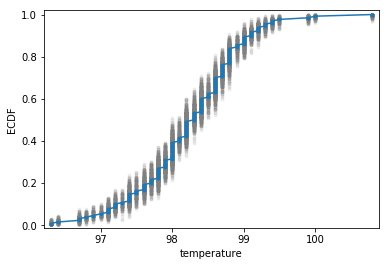

The epirical data distribution is similar to the bootstrap replicates (we prove this on the next step)


In [6]:
for _ in range(130):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(temperature, size=len(temperature))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(temperature)
_ = plt.plot(x, y, marker='.')

# Margins and label axes
plt.margins(0.02)
_ = plt.xlabel('temperature')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

print('The epirical data distribution is similar to the bootstrap replicates (we prove this on the next step)')

The standard error of the mean for the data is 0.0640566146952
The standard error of the bootstrap replicates is 0.0642152313512


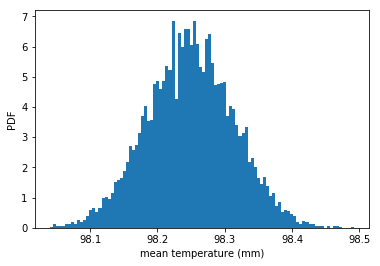

The std are very similar thus we can say the distribution is normal


In [7]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(temperature, np.mean, size=10000)

# Compute and print SEM
sem = np.std(temperature) / np.sqrt(len(temperature))
print('The standard error of the mean for the data is', sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('The standard error of the bootstrap replicates is', bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=100, normed=True)
_ = plt.xlabel('mean temperature (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


print('The std are very similar thus we can say the distribution is normal')

Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

*First one sample because we cannot assume independence

In this situation, is it appropriate to use the  t or z statistic?

*In this case, we can go ahead and do a z statistical analyzes because our sample is large

In [69]:
#This is the one-sample test

#Our null-hypothesis is havong a mean of 98.6 F

#statistical information to be used
mu
sigma
test_mu= 98.6

# z calculation
z = ((mu - test_mu) / (sigma))
print('the z value is', z)

# Compute p-value: p
stats.ttest_1samp(temperature, test_mu)

the z value is -0.4012099385021176


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Here we see that we get similar results in Z value by using scipy which also gives us a very low p

Therefore, we can reject the Null-Hypothesis. This means the actual mean may be different from 98.6

In [67]:
#Assigninng the variables 
df_female = df[df['gender'] == 'F']
df_male = df[df['gender'] == 'M']


def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [62]:
# We draw permutation replicates with the function below

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [63]:
# Here we introduce a function to calculate the mean difference between male and female temperature
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays or df."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [64]:
# Compute empirical mean difference
empirical_diff_means = diff_of_means(df_male.temperature, df_female.temperature)

print(empirical_diff_means)

-0.289230769230727


In [65]:
# We draw 1,000,000 permutation replicates
perm_replicates = draw_perm_reps(df_male.temperature, df_female.temperature,
                                 diff_of_means, size=1000000)


In [66]:
# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)


p-value = 0.98776


Being that the p value is low we can reject the null hypothesis.

# 4) Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [44]:
#here we take a random sample of size 10 (one without gender bias and the other 2 are either only female or male)
from random import sample

# given data frame df
df
df_female
df_male

# create random index
df_index = np.array(sample(range(len(df)), 10))
f_index =  np.array(sample(range(len(df_female)), 10))
m_index =  np.array(sample(range(len(df_male)), 10))

# get 10 random rows from df
sample_df = df.iloc[df_index]
sample_female = df_female.iloc[f_index]
sample_male = df_male.iloc[m_index]

#print(sample_df)
#print(sample_female)
#print(sample_male)

In [70]:
#This is the one-sample test

#Our null-hypothesis is havong a mean of 98.6 F

#statistical information to be used
mu = np.mean(sample_df.temperature)
sigma = np.std(sample_df.temperature)
test_mu= 98.6

# t calculation
t = ((mu - test_mu) / (sigma / np.sqrt(10)))
print(t)

# Compute p-value: p
stats.ttest_1samp(temperature, test_mu)

-1.26873722556


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

For the one-sample test, we have the same result in that the null hypothesis is rejected due to low p.


Below we do the two-sample test.

In [55]:
# Compute empirical mean difference
empirical_diff_means = diff_of_means(sample_male.temperature, sample_female.temperature)

print(empirical_diff_means)

-0.28999999999999204


In [50]:
# We draw 1,000,000 permutation replicates
perm_replicates = draw_perm_reps(sample_male.temperature, sample_female.temperature,
                                 diff_of_means, size=1000000)

In [53]:
# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.855121


The two-sample test for the limited sample gives a smaller p than the full sample p given by the two-sample test. 

# 5) At what temperature should we consider someone's temperature to be "abnormal"?

95% confidence interval = [ 98.12230769  98.37386538]


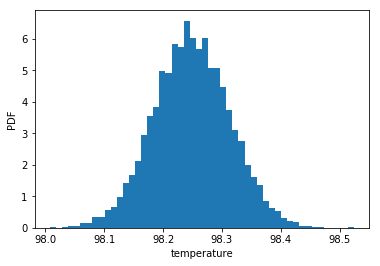

In [89]:
# bootstrap replicates of the mean temperature (equal to mu)
bs_replicates = draw_bs_reps(df.temperature, np.mean, size=10000)

# Compute the 95% confidence interval(about two stdev away from the mean)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int,)

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('temperature')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [81]:
mu = np.mean(df.temperature)

sigma= np.std(df.temperature)
print(sigma , mu)

0.7303577789050377 98.24923076923078


In [85]:
# A 95% confidence interval would be +- 2 std from the mean
CI_upper = mu + (sigma * 2)
CI_lower = mu - (sigma * 2)

print('Upper Limit CI ' + str(CI_upper))
print('Lower Limit CI ' + str(CI_lower))

Upper Limit CI 99.70994632704085
Lower Limit CI 96.7885152114207


I am not sure why the bootstrap gave a more narrower CI than the statistic CI

# 6) Is there a significant difference between males and females in normal temperature?
#What testing approach did you use and why?

In [91]:
#We compare the means by gender
stats.ttest_ind(df_female['temperature'],df_male['temperature'])

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

The small p-value proves that it is not likely that females and males share the same mean temperature value. 

# Conclusion

In conclusion, the sample size was large enough to use the CLT and assume a normal distribution of the temperature. The analysis proved that the average body temperature may not be 98.6 degrees as the one-sample test gave a small enough p-value.In addition, the small p-value given by the two-sample test proves that it is not likely that females and males share the same mean temperature. 